### Perform Principal Component Analysis (PCA) on the dataset ‘Titanic-Dataset.csv’.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [10]:
# 1. Load dataset ‘Titanic-Dataset.csv’. Create a dataframe df.
df=pd.read_excel('Titanic-Dataset.xlsx')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# 2. Convert the feature ' Embarked' from object to integer using map function.
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df['Embarked'].isnull().sum()

np.int64(2)

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
df['Embarked'].isnull().sum()

np.int64(0)

In [16]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'].unique()

array([0, 1, 2])

In [17]:
# 3. Covert the feature ‘Ticket’ from object to integer.
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

In [18]:
df['Ticket'] = df['Ticket'].astype('category').cat.codes

In [19]:
df['Ticket'].unique()

array([523, 596, 669, 219, 488, 310, 106, 425, 374, 252, 616, 208, 535,
       364, 443, 272, 496, 270, 333,  17, 259, 271, 313, 212, 360,  13,
       116, 318, 392, 598, 586, 323, 549, 600, 213,  34, 514, 334,  19,
        68,  75, 421, 634, 317, 617, 478,  98,  23, 407, 511, 522, 587,
        51, 199, 115, 555,  47, 561, 566,  30, 202, 165, 368, 601,  22,
       553, 623, 510, 305, 557, 621,  36,   2, 377, 385, 489, 277, 457,
       336, 343, 315, 195, 637, 509, 676, 652, 329, 330, 371, 678, 548,
       453, 491, 607, 612, 237, 269, 414, 391, 153,  66, 507, 384, 328,
       290, 418, 485, 172,  26, 309,  58,  10, 666, 476, 585, 540, 126,
       479, 541,  29, 349, 410, 640, 537, 231, 552, 630,  77,  65, 592,
        35, 363, 668, 463, 238, 558, 435, 233, 266, 622, 206, 516, 538,
       573, 595, 154, 654, 293, 568, 486, 559, 354, 300, 448, 198, 576,
       175, 659, 111, 442,  55, 593, 288, 574, 629, 234, 306, 204, 475,
       181, 460, 416, 242, 134, 436, 604, 473,  61, 477, 279, 33

In [20]:
# 4. Drop the feature 'Name', ’Sex’, ’Cabin’ as it has object data type.
df.drop(['Name', 'Sex', 'Cabin'], axis=1, inplace=True)

In [21]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,22.0,1,0,523,7.2500,0
1,2,1,1,38.0,1,0,596,71.2833,1
2,3,1,3,26.0,0,0,669,7.9250,0
3,4,1,1,35.0,1,0,219,53.1000,0
4,5,0,3,35.0,0,0,488,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,223,13.0000,0
887,888,1,1,19.0,0,0,184,30.0000,0
888,889,0,3,NaN,1,2,675,23.4500,0
889,890,1,1,26.0,0,0,178,30.0000,1


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [23]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [25]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum().count()

/var/folders/_2/v_dkmqp152sb5hrg5p84lt0r0000gn/T/ipykernel_2442/1646583448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


np.int64(9)

In [26]:
# 5. Import Standard Scaler and perform standardization on the entire data frame.
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc

StandardScaler()

In [27]:
df1= sc.fit_transform(df)

In [28]:
df1=pd.DataFrame(df1, columns = df.columns)
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,0.912982,-0.502445,-0.568837
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,1.277853,0.786845,1.005181
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,1.642724,-0.488854,-0.568837
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,-0.606480,0.420730,-0.568837
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,0.738044,-0.486337,-0.568837
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.586487,-0.386671,-0.568837
887,1.718444,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.781418,-0.044381,-0.568837
888,1.722332,-0.789272,0.827377,-0.104637,0.432793,2.008933,1.672713,-0.176263,-0.568837
889,1.726220,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.811407,-0.044381,1.005181


In [29]:
# 6. Perform PCA.
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [31]:
pca1=pca.fit_transform(df1)
pca1

array([[ 1.65853775,  0.39434167],
       [-1.77508854,  0.28518193],
       [ 0.80807226,  0.07529758],
       ...,
       [ 1.14235128,  1.60241559],
       [-1.7457826 , -0.8246305 ],
       [ 0.94880702, -1.05403834]])

In [32]:
pca.explained_variance_ratio_

array([0.2113174 , 0.18578374])

In [33]:
pca.explained_variance_ratio_.sum()

np.float64(0.39710113344369735)

In [34]:
df2=pd.DataFrame(data=pca1,columns=['PC1','PC2'])
df2

,PC1,PC2
0,1.658538,0.394342
1,-1.775089,0.285182
2,0.808072,0.075298
3,-1.799692,0.064319
4,1.280948,-0.565350
...,...,...
886,0.165304,-0.922848
887,-1.495466,-0.485367
888,1.142351,1.602416
889,-1.745783,-0.824630


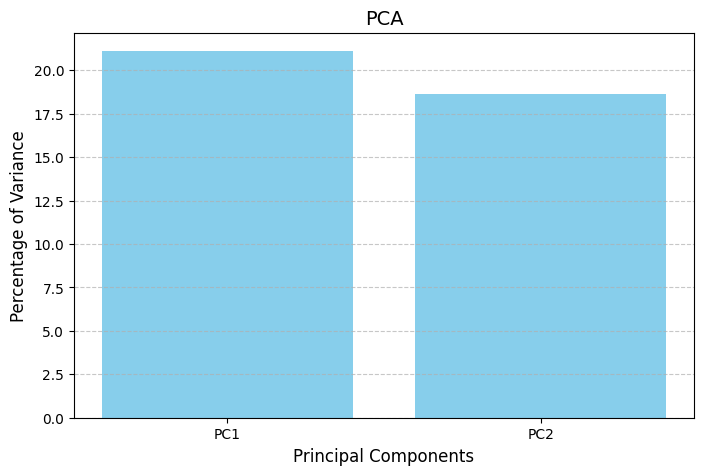

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Example explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels, color='skyblue')
plt.ylabel('Percentage of Variance', fontsize=12)
plt.xlabel('Principal Components', fontsize=12)
plt.title('PCA', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
